In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

%matplotlib inline
np.set_printoptions(formatter={'all':lambda x: str(x)})

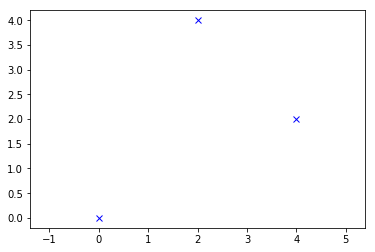

In [44]:
X = np.array([[2, 4], [4, 2], [0, 0]])
plt.plot(X[:,0], X[:,1], 'bx')
plt.axis('equal')
plt.show()

In [66]:
model = GaussianMixture(n_components=2, max_iter=1,
                        warm_start=True,
                        verbose=1, verbose_interval=1)

In [67]:
sigma = np.array([             
    np.identity(2),
    np.identity(2)
])
model.fit(X)                                # Now it thinks it is trained
model.weights_ = np.array([0.7, 0.3])       # mixture weights (n_components,) 
model.means_ = np.array([[0, 4], [4, 0]])   # mixture means (n_components, 2) 
model.covariances_ = sigma                  # mixture cov (n_components, 2, 2)
model.precisions_cholesky_ = np.linalg.cholesky(np.linalg.inv(sigma)).transpose((0, 2, 1))

Initialization 0
  Iteration 1
Initialization converged: False


/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


In [68]:
D = 2
for iteration in range(0, 3):
    print('--------------------------------------------')
    print('Iteration:', iteration)
    print('\nWeights:', model.weights_)
    print('\nMeans:')
    print(model.means_)
    print('\nCovariances')
    print(model.covariances_)
    
    print('Likelihoods:')
    for i, x in enumerate(X):
        for j, (c, m, p) in enumerate(zip(model.covariances_, model.means_, model.weights_)):
            likelihood = ( 1. / ((2 * np.pi)**(D/2)) ) * \
                         ( 1. / np.linalg.det(c)**0.5 ) * \
                         np.exp( -0.5 * (x-m).T @ np.linalg.inv(c) @ (x-m))
            print(f'x: {x}, myu: {m} => likelihood: {likelihood: 0.10f} => joint: {p * likelihood: 0.10f}')
    model.fit(X)

--------------------------------------------
Iteration: 0

Weights: [0.7 0.3]

Means:
[[0 4]
 [4 0]]

Covariances
[[[1.0 0.0]
  [0.0 1.0]]

 [[1.0 0.0]
  [0.0 1.0]]]
Likelihoods:
x: [2 4], myu: [0 4] => likelihood:  0.0215392793 => joint:  0.0150774955
x: [2 4], myu: [4 0] => likelihood:  0.0000072256 => joint:  0.0000021677
x: [4 2], myu: [0 4] => likelihood:  0.0000072256 => joint:  0.0000050579
x: [4 2], myu: [4 0] => likelihood:  0.0215392793 => joint:  0.0064617838
x: [0 0], myu: [0 4] => likelihood:  0.0000533905 => joint:  0.0000373734
x: [0 0], myu: [4 0] => likelihood:  0.0000533905 => joint:  0.0000160172
Initialization 0
  Iteration 1
Initialization converged: False
--------------------------------------------
Iteration: 1

Weights: [0.5668794616295193 0.4331205383704826]

Means:
[[1.1776995364874705 2.3526396365429902]
 [3.0762483021642173 1.538456042595401]]

Covariances
[[[0.9721031233080706 1.9364162878952134]
  [1.9364162878952134 3.8738066624508534]]

 [[2.841248070070

/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Users/martin/Library/Python/3.7/lib/python/site-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


In [ ]:
X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1,6))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = model.score_samples(XX)
Z = Z.reshape((50,50))
 
plt.contour(X, Y, Z)
plt.scatter(X_train[:, 0], X_train[:, 1])
 
plt.show()